ï»¿Countries, BirthRate(Per1000), LifeExpectancy
(2008)Afghanistan, 46.613, 47.532
(2008)Albania, 14.69, 76.492
(2008)Algeria, 20.804, 72.44
(2008)Angola, 42.908, 49.879
(2008)Argentina, 17.372, 75.387
(2008)Armenia, 15.222, 73.794
(2008)Aruba, 11.846, 74.811
(2008)Australia, 12.741, 81.567
(2008)Austria, 9.138, 80.51
(2008)Azerbaijan, 19, 70.15
(2008)Bahamas, 16.863, 74.848
(2008)Bahrain, 18.151, 74.675
(2008)Bangladesh, 21.589, 68.007
(2008)Barbados, 11.237, 76.343
(2008)Belarus, 9.97, 69.194
(2008)Belgium, 11.293, 79.777
(2008)Belize, 24.916, 75.388
(2008)Benin, 39.599, 54.86
(2008)Bhutan, 21.522, 66.066
(2008)Bolivia, 27.349, 65.701
(2008)Bosnia and Herzegovina, 9.168, 75.221
(2008)Botswana, 24.676, 52.812
(2008)Brazil, 16.405, 72.464
(2008)Brunei, 20.061, 77.6
(2008)Bulgaria, 9.558, 73.317
(2008)Burkina Faso, 47.819, 54.065
(2008)Burundi, 34.581, 49.054
(2008)Cambodia, 24.89, 61.736
(2008)Cameroon, 37.113, 50.194
(2008)Canada, 10.625, 80.743
(2008)Cape Verde, 24.261, 73.587
(2008)

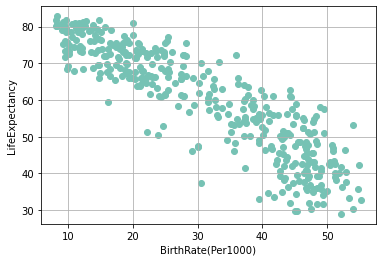


Converging centres:
[[39.11111111 59.48594444]
 [32.78325    70.171     ]
 [29.43025    55.84685   ]
 [21.19344118 64.92185294]
 [39.90865517 54.64713793]
 [26.49908333 71.66816667]
 [24.81469231 67.55715385]
 [17.87815789 77.02042105]
 [48.68788889 33.76281481]
 [22.07866667 73.08527778]
 [41.75959459 43.66244649]
 [33.10769231 64.17830769]
 [49.62702941 42.34547059]
 [11.63647887 76.30980282]
 [17.799      71.85446667]
 [46.57107143 50.73139286]]

[[39.77772222 60.10616667]
 [32.78325    70.171     ]
 [29.42036842 55.40826316]
 [21.20854839 64.89125806]
 [38.8497931  53.81958621]
 [26.6086     72.1758    ]
 [25.35773333 67.08853333]
 [17.42825    76.9026    ]
 [47.74551515 34.1929697 ]
 [22.36142105 73.58305263]
 [41.27547826 43.70924   ]
 [32.64728571 63.66114286]
 [49.16525714 42.10162857]
 [10.92266667 77.58380702]
 [16.38306667 70.7406    ]
 [46.48368571 51.43345714]]

[[40.22105    59.79      ]
 [32.78325    70.171     ]
 [29.25042857 53.82371429]
 [21.27716129 65.09232258]
 [3

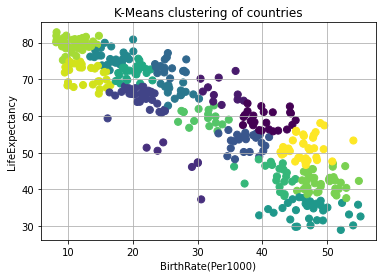

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.metrics import pairwise_distances_argmin
from collections import Counter, defaultdict

def label(X, center):
    l = []
    temp = [0] * len(center)
    for i in range(len(X)):
        for j in range(len(center)):
            temp[j] = np.sqrt((X[i][0] - center[j][0])**2 + (X[i][1] - center[j][1])**2)
        mymin = np.min(temp)
        for i in range(len(temp)):
            if temp[i] == mymin:
                l.append(i)
    l = np.hstack((l))
    return l

# X = [[1., 1.],[2., 1.],[4., 3.],[5., 4.]]

# center = [[1., 1.],[2., 1.]]
# label(X,center)

def read_csv():
    x = []
    y = []
    countries = []
    x_label = ""
    y_label = ""
    with open('C:/Users/WarMachine/Desktop/AI/dataBoth.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',')
        lines = 0
        for row in reader:
            if lines >= 1:
                print(', '.join(row))
                x.append(float(row[1]))
                y.append(float(row[2]))
                countries.append(row[0])
                lines += 1
            else:
                x_label = row[1]
                y_label = row[2]
                print(', '.join(row))
                lines += 1
    return x, y, x_label, y_label, countries

x, y, x_label, y_label, countries = read_csv()
X = np.vstack((x, y)).T

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.scatter(x, y, color = '#76c2b4')
plt.grid()
plt.show()

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    # The main loop
    # This loop continues until convergence. 
    # You could make it run a set number of times by changing
    # it to say while x > 5, for example, and removing the break
    print('\nConverging centres:')
    while True:
        # 2a. Assign labels based on closest center
        # I am using the pairwise_distance_argmin method to 
        # calculate distances between points to centers
        #labels = pairwise_distances_argmin(X, centers, metric='manhattan')
        labels = label(X, centers)
#         print('lablel and center',labels,centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        # Print converging centers
        print(centers)
        print()
        
    return centers, labels

clust_num = 16

center, labels = find_clusters(X, clust_num)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('K-Means clustering of countries')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()
plt.show()

In [51]:
a = [0, 0, 0, 1]
b = [0, 3, 3, 5]
print(np.hstack((a)))

[0 0 0 1]


---
>>

Pillow Version: 8.4.0
JPEG
RGB
(640, 360)


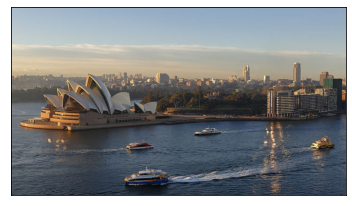

In [63]:
import PIL
print('Pillow Version:', PIL.__version__)
# Load and show an image wiht Pillow
from PIL import Image
# Load the image
image = Image.open("C:/Users/WarMachine/Desktop/AI/Sydney-Opera-House.jpg")
# Summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# Show image
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image);

uint8
(360, 640, 3)


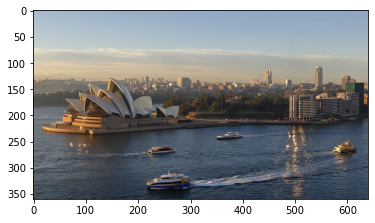

In [1]:
# Loae and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# Load image as pixel array
data = image.imread("C:/Users/WarMachine/Desktop/AI/Sydney-Opera-House.jpg")
# Summarize shape of pixel array
print(data.dtype)
print(data.shape)
# Display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

(360, 640, 3)
None
RGB
(640, 360)


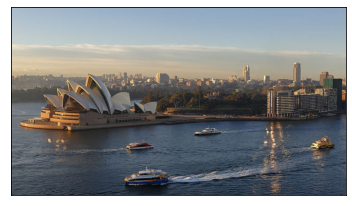

In [66]:
'''The example below loads the photo as a Pillow Image object and 
converts it to a NumPy array, then converts it back to an 
Image object again.'''
from PIL import Image
from numpy import asarray
# load the image
image = Image.open("C:/Users/WarMachine/Desktop/AI/Sydney-Opera-House.jpg")
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image2);

In [69]:
'''For example, you could easily load all images in a directory
as a list as follows:'''

# load all images in a directory
from os import listdir
from matplotlib import image
# load all images in a directory
loaded_images = list()
for filename in listdir('C:/Users/WarMachine/Desktop/AI'):
    # load image
    img_data = image.imread('C:/Users/WarMachine/Desktop/AI/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))

PermissionError: [Errno 13] Permission denied: 'C:/Users/WarMachine/Desktop/AI/.ipynb_checkpoints'

>>>

float64
(230400, 3)


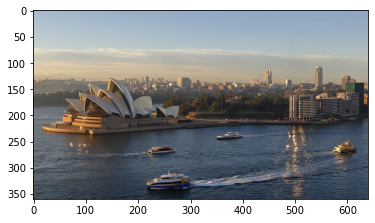

(230400, 3)

In [24]:
# Loae and display an image with Matplotlib
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
# Load image as pixel array
img = image.imread("C:/Users/WarMachine/Desktop/AI/Sydney-Opera-House.jpg")
# Summarize shape of pixel array
print(data.dtype)
print(data.shape)
# Display the array of pixels as an image
pyplot.imshow(img)
pyplot.show()

data = img / 255.0 # use 0...1 scale
data = data.reshape(360 * 640, 3)
data.shape

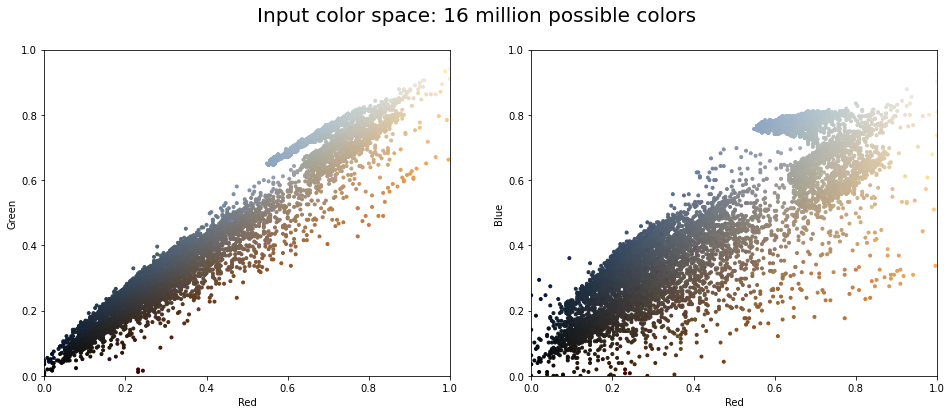

In [25]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);
    
plot_pixels(data, title='Input color space: 16 million possible colors')


Medicine, Weight, pH-Index
A, 1, 1
B, 2, 1
C, 4, 3
D, 5, 4
[[1. 1.]
 [2. 1.]
 [4. 3.]
 [5. 4.]] X


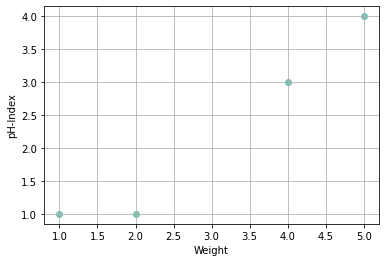

i [2 3 1]
Find Cent [[4. 3.]
 [5. 4.]
 [2. 1.]]

Converging centres:
[[4.  3. ]
 [5.  4. ]
 [1.5 1. ]]



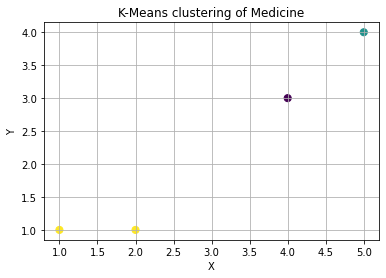

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.metrics import pairwise_distances_argmin
from collections import Counter, defaultdict

def label(X, center):
    l = []
    temp = [0] * len(center)
    for i in range(len(X)):
        for j in range(len(center)):
            temp[j] = np.sqrt((X[i][0] - center[j][0])**2 + (X[i][1] - center[j][1])**2)
        mymin = np.min(temp)
        for i in range(len(temp)):
            if temp[i] == mymin:
                l.append(i)
    l = np.hstack((l))
    return l
# X = [[1., 1.],[2., 1.],[4., 3.],[5., 4.]]

# center = [[1., 1.],[2., 1.]]
# label(X,center)

def read_csv():
    x = []
    y = []
    countries = []
    x_label = ""
    y_label = ""
    with open('C:/Users/WarMachine/Desktop/AI/Medicine.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',')
        lines = 0
        for row in reader:
            if lines >= 1:
                print(', '.join(row))
                x.append(float(row[1]))
                y.append(float(row[2]))
                countries.append(row[0])
                lines += 1
            else:
                x_label = row[1]
                y_label = row[2]
                print(', '.join(row))
                lines += 1
    return x, y, x_label, y_label, countries

x, y, x_label, y_label, countries = read_csv()
X = np.vstack((x, y)).T
print(X,'X')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.scatter(x, y, color = '#76c2b4')
plt.grid()
plt.show()

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    print('i',i)
    centers = X[i]
    print('Find Cent', centers)
    # The main loop
    # This loop continues until convergence. 
    # You could make it run a set number of times by changing
    # it to say while x > 5, for example, and removing the break
    print('\nConverging centres:')
    while True:
        # 2a. Assign labels based on closest center
        # I am using the pairwise_distance_argmin method to 
        # calculate distances between points to centers
#         labels = pairwise_distances_argmin(X, centers, metric='manhattan')
        labels = label(X, centers)
        #print('lablel and center',labels,centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        # Print converging centers
        print(centers)
        print()
        
    return centers, labels
# X = data.copy()
clust_num = 3

center, labels = find_clusters(X, clust_num)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('K-Means clustering of Medicine')
plt.xlabel('X') # x_label
plt.ylabel('Y') # y_label
plt.grid()
plt.show()

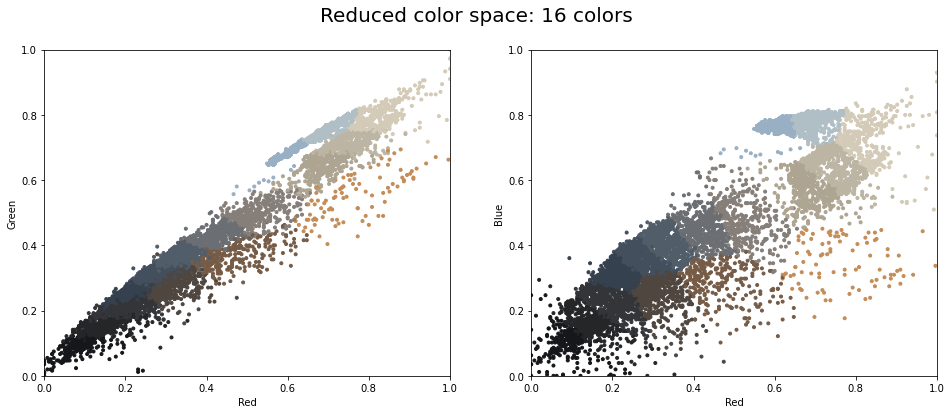

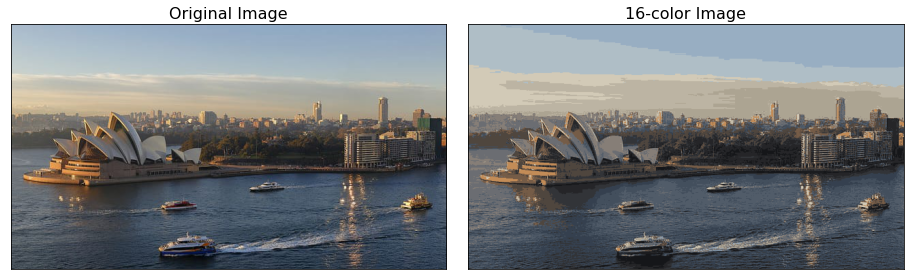

In [27]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters = 16, batch_size=2048)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,
title="Reduced color space: 16 colors")

img_recolored = new_colors.reshape(img.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
 subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('16-color Image', size=16);

>>>

In [28]:
# def ass(temp):
#     l = []
    
#     flag = len(temp)-1
#     for i in range(len(temp)-1):
#         if temp[i] < temp[i+1]:
#             flag-=1
#     print(flag)

ass([2, 3, 1, 0])

import numpy as np

a = np.array([10,2,3,4,5,6,20]) 
# l = np.where(a == a.min())
# print(l)

mymin = np.min(a)
print(mymin)
# min_positions = [i for i, x in enumerate(a) if x == mymin]
for i in range(len(a)):
    if a[i] == mymin:
        print(i)

2
2
1
